In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_classif


In [8]:
# read the preprocessed data profile 
df_processed = pd.read_csv('../data/processed/processed_data.csv')

# Automatic feature selection using mutual information method

In [36]:
# Assuming df is your DataFrame and the last column is the target variable
X = df_processed.iloc[:, :-1]  # all rows, all columns except the last
y = df_processed.iloc[:, -1]   # all rows, only the last column


# Using Mutual Information to select features
# The number of features you want to keep (k) can be adjusted. 
selector = SelectKBest(score_func=mutual_info_classif, k=5)

# Fit the selector to the data
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_indices]

print("Selected features based on Mutual Information:", selected_feature_names)

# If you need a DataFrame with selected features and the target variable
selected_df = df_processed[selected_feature_names.tolist() + [df_processed.columns[-1]]]


Selected features based on Mutual Information: Index(['PS2_mean', 'PS2_std_dev', 'PS2_variance', 'PS6_median', 'TS3_mean'], dtype='object')


# Selected Features EDA 

In [37]:
print(selected_df.head())
print(selected_df.info())

     PS2_mean  PS2_std_dev  PS2_variance  PS6_median   TS3_mean  label
0  109.466914    47.110581   2219.406874       9.733  38.471017      1
1  109.354890    47.041690   2212.920635       9.526  38.978967      1
2  109.158845    46.988144   2207.885686       9.425  39.631950      1
3  109.064807    46.968307   2206.021860       9.335  40.403383      1
4  108.931434    46.871040   2196.894373       9.260  41.310550      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PS2_mean      2205 non-null   float64
 1   PS2_std_dev   2205 non-null   float64
 2   PS2_variance  2205 non-null   float64
 3   PS6_median    2205 non-null   float64
 4   TS3_mean      2205 non-null   float64
 5   label         2205 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 103.5 KB
None


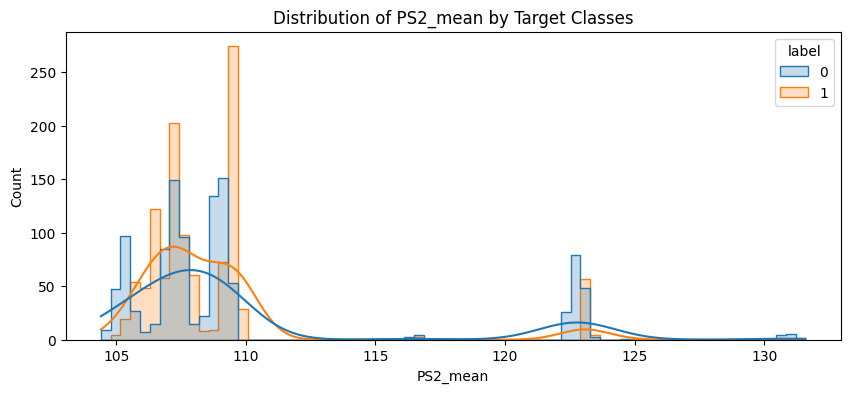

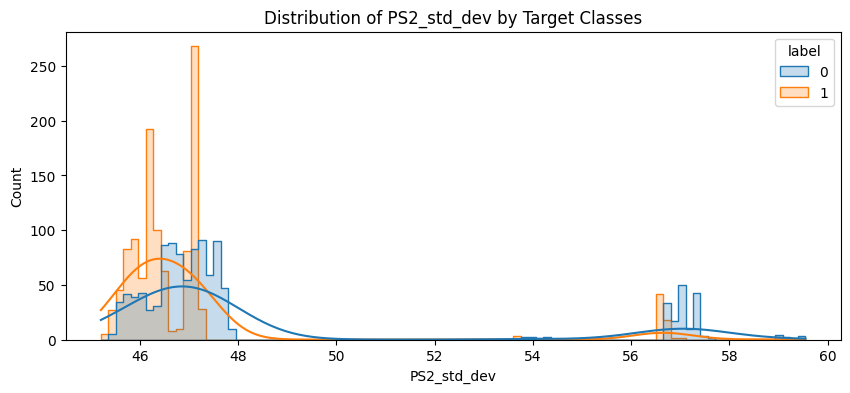

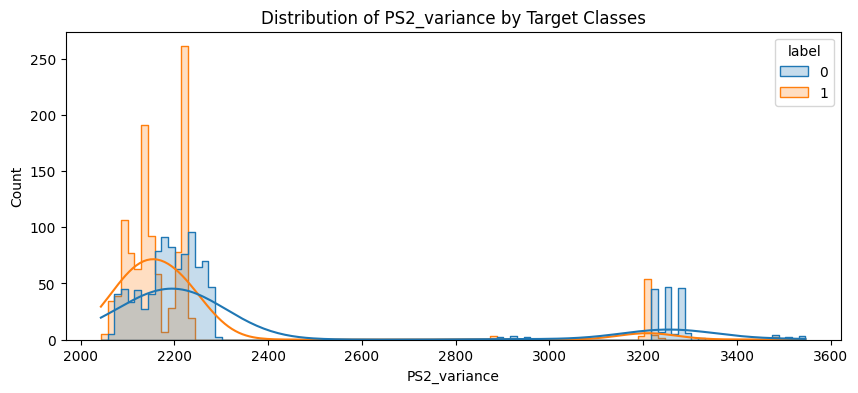

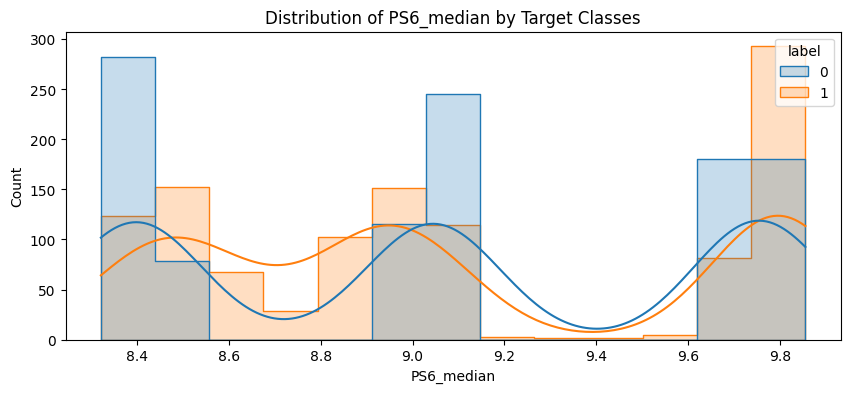

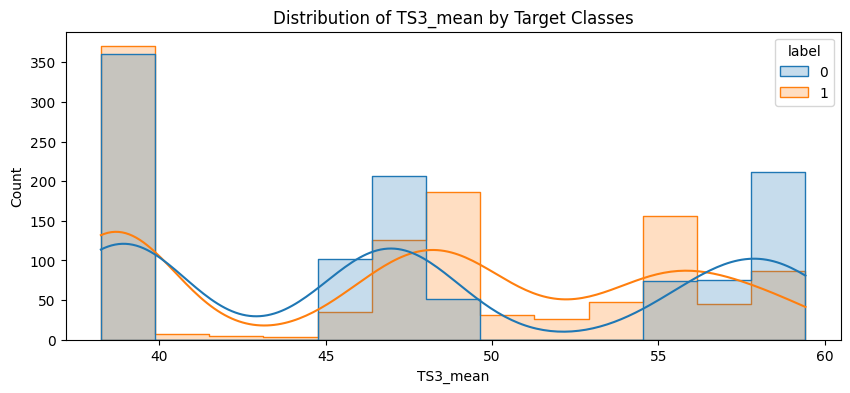

In [39]:
for column in selected_feature_names: #selected_df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=selected_df, x=column, hue='label', kde=True, element='step')
    plt.title(f'Distribution of {column} by Target Classes')
    plt.show()


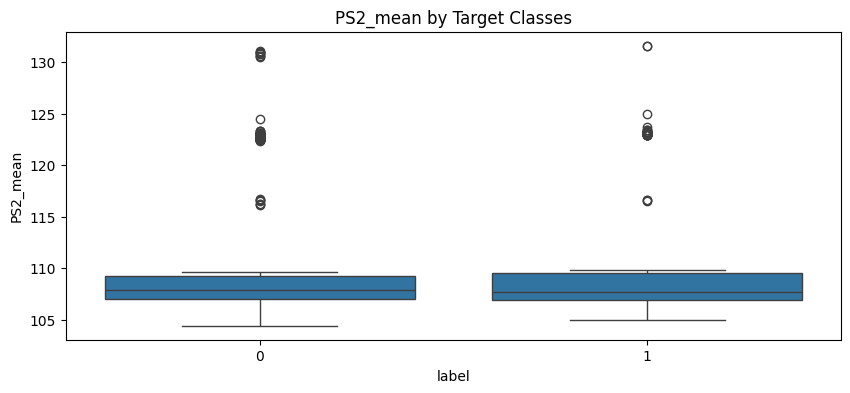

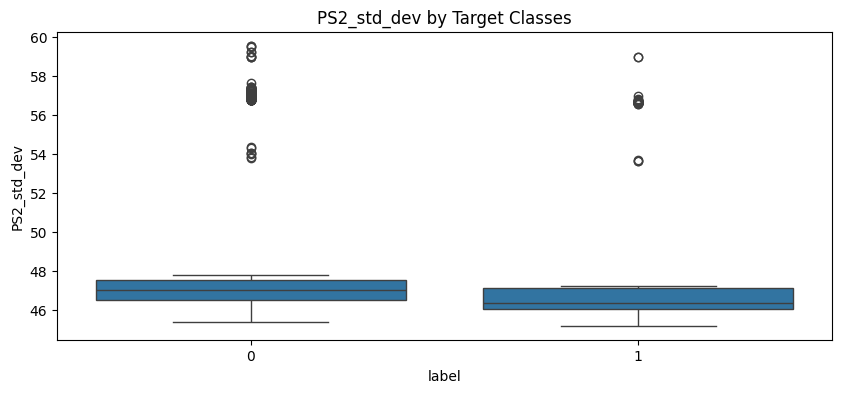

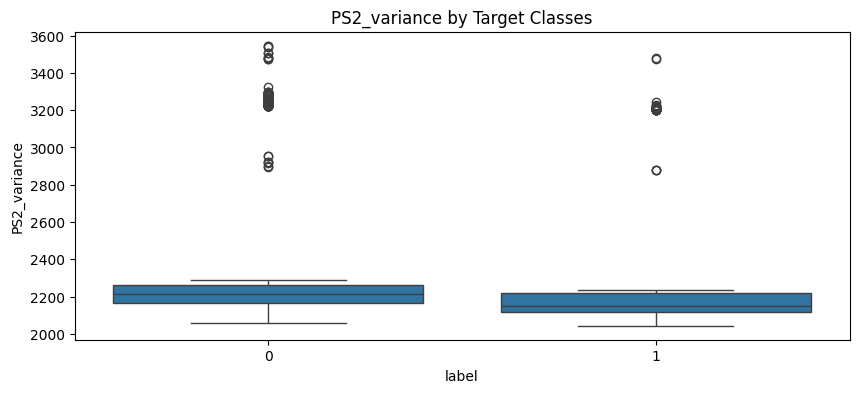

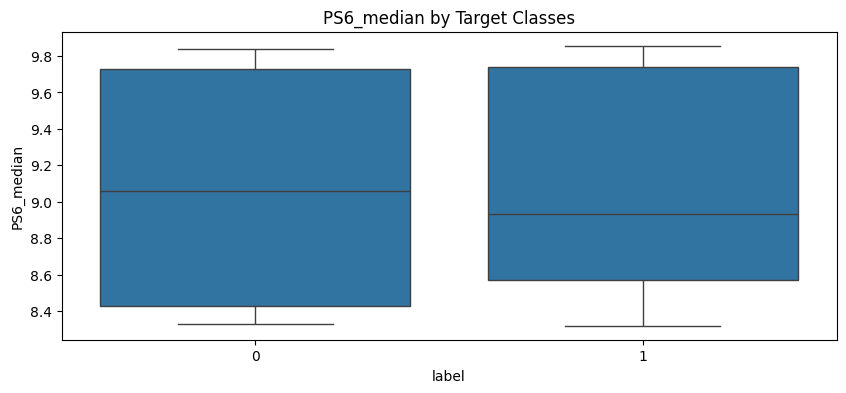

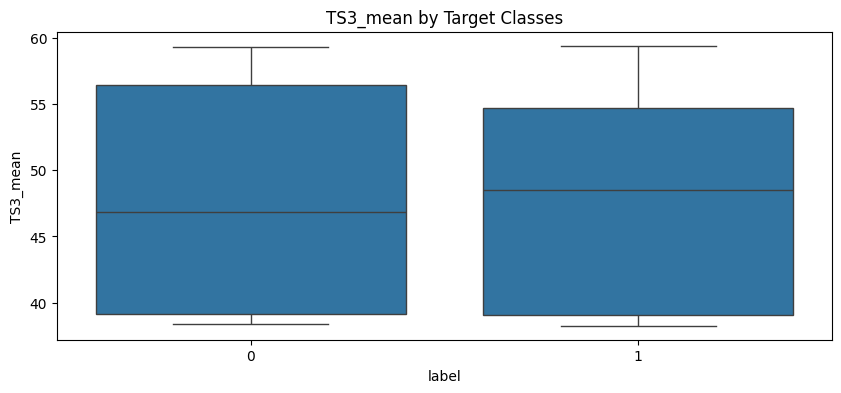

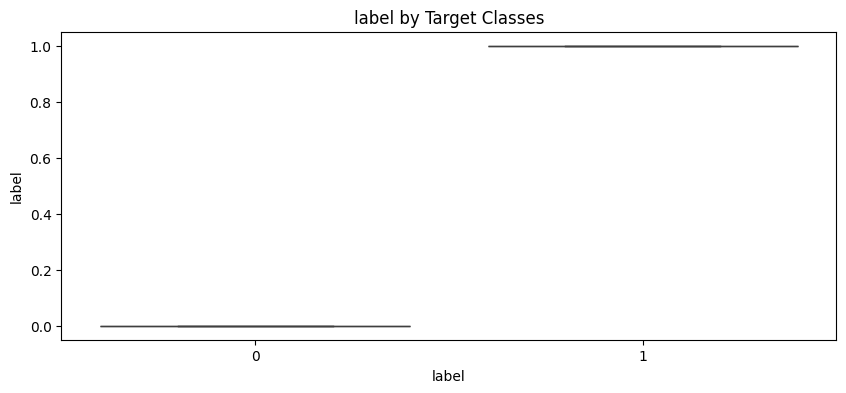

In [40]:
for column in selected_df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='label', y=column, data=selected_df)
    plt.title(f'{column} by Target Classes')
    plt.show()


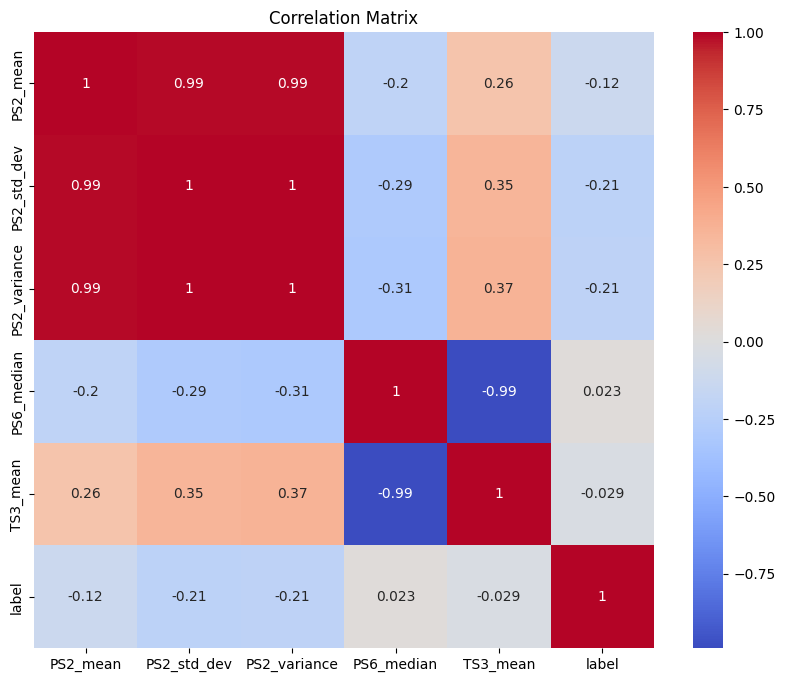

In [41]:
corr = selected_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Save the data 

## Split data for modeling and inference (prediction service)

In [42]:
df_for_modeling = selected_df.loc[:2000]
df_for_eval = selected_df.loc[2001:]

In [43]:
print(df_for_modeling.shape)
print(df_for_modeling.shape)

(2001, 6)
(2001, 6)


In [45]:
df_for_modeling.to_csv('../data/for_modeling/df_for_modeling.csv', index=False)
df_for_eval.to_csv('../deployment/df_for_eval.csv', index=False)